# CHBE 263 Python Assignment

Group 12: Will Brooks, Alex Cho, Neal , James Han, Fawaz Asif
## Table of Contents
1. [Introduction](##Introduction)
2. [Part A: Pipetting](##Part-A-Pipetting)
3. [Part B: Spectrophotometry](##Part-B:-Spectrophotometry)
4. [Part C:  Identifying Outliers with Q-test](##Part-C:-Identifying-Outliers-with-Q-test)


## Introduction
This is an assigment meant to mimic the calculations we conducted in excel for lab O, the introduction lab meant to get us used to common laboratory practices and basic laboratory tools.

These are the basic libraries we will need, and the average function.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats # Didn't use this as you cannot fit the curve through 0
import pandas as pd

# Simple function to compute the average of a list
def avg(arr): 
    return sum(arr)/len(arr)

## Part A: Pipetting


This part of the lab we attempted to measure the accuracy of different pipettes in the lab. This was done by measuring the weight of the water pippetted, and dividing by its density to acertain the volume. This could then be compared to the targets to determine accuracy.

Here we define the targets for the experiment as well as the density of water at $26^\degree C$

In [2]:
DENSITY_W = 0.9979
TARGET_1 = 1

TARGET_2 = 5

Once these constants have been defined, we will extract the values of the excel file and put it into a dataframe.

In [16]:
mass_data = pd.read_csv('data/O_Lab_Data.csv')

From these values we can now compute these calculations:
- Average: $\bar{V} = \frac{\sum m_i}{i \cdot \rho} $
- Accuracy: $\text{Acc} = \frac{\bar{V} - V_T}{V_t}\cdot 100\%$
- Standard DeviatioN: This is computed using the numpy standard deviation function using a degree of freedom of 1, defining it as the sample mean and not the population mean
- Relative Standard Deviation: $\text{Relative Standard Deviation} = \frac{\sigma}{V_T}\cdot 100\%$

#### P1000 1mL Target

In [ ]:
print("Average Volume of Measurements P1000 targetting 1mL:", round(avg(mass_data.P1000_1ml)/DENSITY_W, 4), "mL")
print("Accuracy of Measurements:", round((avg(mass_data.P1000_1ml)/DENSITY_W-TARGET_1)*100,2), "% error")
print("Standard Deviation of Measurements", round(np.std(mass_data.P1000_1ml/DENSITY_W, ddof=1), 4), "mL")
print("The relative standard deviation of Measurements", round(np.std(mass_data.P1000_1ml/DENSITY_W, ddof=1)/TARGET_1*100, 2), "%")

Average Volume of Measurements P1000 targetting 1mL: 1.0053 mL
Accuracy of Measurements: 0.53 % error
Standard Deviation of Measurements 0.0022 mL
The relative standard deviation of Measurements 0.22 %


#### P5000 1mL Target

In [13]:
print("Average Volume of Measurements P5000 targetting 1mL:", round(avg(mass_data.P5000_1ml)/DENSITY_W, 4), "mL")
print("Accuracy of Measurements:", round((avg(mass_data.P5000_1ml)/DENSITY_W-TARGET_1)*100,2), "% error")
print("Standard Deviation of Measurements", round(np.std(mass_data.P5000_1ml/DENSITY_W, ddof=1), 4), "mL")
print("The relative standard deviation of Measurements", round(np.std(mass_data.P5000_1ml/DENSITY_W, ddof=1)/TARGET_1*100, 2), "%")

Average Volume of Measurements P5000 targetting 1mL: 1.0177 mL
Accuracy of Measurements: 1.77 % error
Standard Deviation of Measurements 0.0051 mL
The relative standard deviation of Measurements 0.51 %


#### P5000 5mL Target

In [19]:
print("Average Volume of Measurements P5000 targetting 5mL:", round(avg(mass_data.P5000_5ml)/DENSITY_W, 4), "mL")
print("Accuracy of Measurements:", round(abs((avg(mass_data.P5000_5ml)/DENSITY_W-TARGET_2))*100,2), "% error")
print("Standard Deviation of Measurements", round(np.std(mass_data.P5000_5ml/DENSITY_W, ddof=1), 4), "mL")
print("The relative standard deviation of Measurements", round(np.std(mass_data.P5000_5ml/DENSITY_W, ddof=1)/TARGET_1*100, 2), "%")


Average Volume of Measurements P5000 targetting 5mL: 4.9915 mL
Accuracy of Measurements: 0.85 % error
Standard Deviation of Measurements 0.0128 mL
The relative standard deviation of Measurements 1.28 %


## Part B: Spectrophotometry

This section of the lab we were creating a standard calibration curve to calculate the concentration of an unknown sample. 

This was done using Ambert Beer's Law: $A = \epsilon bC$ and fitting a linear regression to this equation.

Importing our collected spectrophotometry data.

In [20]:
spectro_data_c = pd.read_csv('data/Collected_Spectro_Data.csv')

Here I convert the data that we collected into dictionary for easier use:

In [21]:
def csv_to_dict(dataframe, unknowns):
    
    csv_data = []

    for i  in range(len(dataframe.columns) - 1 - unknowns):
        data = {
            "Concentration": float(dataframe.iloc[i, 0]),  
            "Absorbance": dataframe.iloc[:, i+1].dropna(),
            "Average Absorbance": avg(dataframe.iloc[:, i+1].dropna())
        }
        csv_data.append(data)
    
    return csv_data


all_data = csv_to_dict(spectro_data_c, 1)

Below we perform the linear regression (Forced Intercept) and calculate the standard error:
- Linear regression with forced y-intercept of 0 has the following formula: $m = \frac{\sum (C\cdot A)}{\sum (C^2)}$
- The standard error for this is now computed with: $m = \sqrt{\frac{\sum (A - mC)^2}{(n-1)\cdot \sum C^2}}$
- Plotting is then done with the slope and matplotlib

Slope (m): 0.0276 mg/L
Uncertainty in the Calibration Curve Slope is: 0.00181 mg/L
Average Absorbance of Unknown Sample: 0.1704
Concenrtation of Unknown Sample is 6.18 mg/L


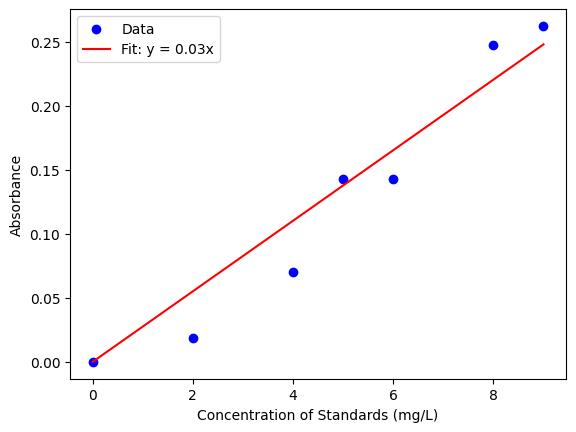

In [ ]:
concentrations = np.array([])
avg_aus = np.array([])
data_adjust = all_data[0]["Average Absorbance"]

# Adjust data and put it in an easier format to use
for dataset in all_data:
    dataset["Average Absorbance"] -= data_adjust
    avg_aus = np.append(avg_aus, dataset["Average Absorbance"]) 
    concentrations = np.append(concentrations, dataset["Concentration"])

m = np.sum(concentrations * avg_aus) / np.sum(concentrations**2)

se_m = np.sqrt(np.sum((avg_aus - concentrations*m)**2)/((len(concentrations)-1)*np.sum(concentrations**2)))

# Print results
print("Slope (m):", round(m, 4), "mg/L")
print(f"Uncertainty in the Calibration Curve Slope is: {se_m:.5f}", "mg/L")
print("Average Absorbance of Unknown Sample:", round(avg(spectro_data_c.Unknown.dropna()-data_adjust), 5))
print("Concenrtation of Unknown Sample is",round((avg(spectro_data_c.Unknown.dropna())-data_adjust)/m, 2), "mg/L")


# Plot data and regression line
plt.scatter(concentrations, avg_aus, color='blue', label='Data')
plt.plot(concentrations, m * concentrations, color='red', label=f'Fit: y = {m:.2f}x')
plt.xlabel('Concentration of Standards (mg/L)')
plt.ylabel('Absorbance')
plt.legend()
plt.show()



## Part C: Identifying Outliers with Q-test


For this section we will mimic what we did in excel by checking for outliers inside of the dataset that we were given. We will do this by conducting the Q Test. A statistcal test that analyzes the relative gaps between data points. To start w
e define the critical Q from the Q table provided in the pre-lab.

In [ ]:
Q_CRITICAL = 0.1846

We will iterate trhough the the data set to check if all values pass the Q test, with a sorted array this process is relatively simple. 

For the Q test we will pass the array into the function until the Q values are less than the Q Critical:
- Q Test Formula: $Q = \frac{\text{Gap}}{\text{Range}}$

In [63]:
spectro_data_g = pd.read_csv('data/Given_Spectro_Data.csv')

sorted_au = sorted(spectro_data_g.Absorbance) # Sorts from smallest to largest

def q_test(sorted_data):
    
    if Q_CRITICAL < (sorted_au[-1] - sorted_au[-2])/(max(sorted_data)-min(sorted_data)):# 2 cases for possible outliers, the max value of the data set, and the minimum value fo the dataset
        print(f"\nThe Outlier is: {sorted_data[-1]:.3f}")
        print(f"The Q value of this outlier is: {(sorted_au[-1] - sorted_au[-2])/(max(sorted_data)-min(sorted_data)):.3f}. This is greater than Q Critical: {Q_CRITICAL:.3f}")
        print(f"The range of this dataset is: {max(sorted_data) - min(sorted_data):.3f}")
        
        del sorted_data[-1]
        q_test(sorted_data) 
    elif Q_CRITICAL < (sorted_au[1] - sorted_au[0])/(max(sorted_data)-min(sorted_data)):
        print(f"\nThe Outlier is: {sorted_data[0]:.3f}")
        print(f"The Q value of: {(sorted_au[1] - sorted_au[0])/(max(sorted_data)-min(sorted_data)):.3f}. This is greater than Q Critical: {Q_CRITICAL:.3f}")
        print(f"The range of this dataset is: {max(sorted_data) - min(sorted_data):.3f}")
        
        del sorted_data[0]
        q_test(sorted_data)  
    
    return sorted_data

Here we perform the Q test and the results of it:

In [64]:
clean_data = q_test(sorted_au)

print(f"\nThe Final Range is: {max(clean_data) - min(clean_data):.3f}")
print(f"The Q value of the lowest value is: {(clean_data[1] - clean_data[0])/(max(clean_data)-min(clean_data)):.3f}")
print(f"The Q value of the largest value is: {(clean_data[-1] - clean_data[-2])/(max(clean_data)-min(clean_data)):.3f}")
print(f"The Q Critical used was: {Q_CRITICAL:.3f}")


The Outlier is: 0.390
The Q value of: 0.286. This is greater than Q Critical: 0.185
The range of this dataset is: 0.280

The Outlier is: 0.670
The Q value of this outlier is: 0.200. This is greater than Q Critical: 0.185
The range of this dataset is: 0.200

The Final Range is: 0.160
The Q value of the lowest value is: 0.125
The Q value of the largest value is: 0.094
The Q Critical used was: 0.185


This was some extra code I wrote for the IQR test.

In [ ]:
# This was useless but i didn't realize until it was too late
# Its the IQR test and everything needed for it
'''
def median(sorted_arr):
    if len(sorted_arr) % 2 == 0:
        median = avg(sorted_arr[int(len(sorted_arr)/2-1):int(len(sorted_arr)/2)])
    else:
        median = sorted_arr[int(len(sorted_arr)/2)]
        
    return median


def q_vals(sorted_arr):
    if len(sorted_arr) % 2 == 0:
        q1 = median(sorted_arr[0:int(len(sorted_arr)/2-1)])
        q3 = median(sorted_arr[int(len(sorted_arr)/2):-1])
    else:
        q1 = median(sorted_arr[0:(int(len(sorted_arr)/2)-1)])
        q3 = median(sorted_arr[int(len(sorted_arr)/2):-1])

    print(q1, ", ", q3)
    
    q_values = {
        "Q1": q1,
        "Q2": median(sorted_arr), 
        "Q3": q3,
        "IQR": q3 - q1
        
    }
    
    return q_values
    
def q_test(sorted_data):
    max_val = max(sorted_data)
    min_val = min(sorted_data)
    
    qs = q_vals(sorted_data)
    
    if max_val >  qs["Q3"] + qs["IQR"] * 1.5:
        del sorted_data[-1]
        q_test(sorted_data)
    elif min_val < qs["Q1"] - qs["IQR"] * 1.5:
        del sorted_data[0]
        q_test(sorted_data)
    else:
        return sorted_data
    
    
    '''